<h1><center> Plot simulation results: data07

<h4> Output file directory: `JuliaSEM/output/flux_sims/data__.out`

Plotting scripts: `JuliaSEM/scripts/plots.jl`, `JuliaSEM/scripts/earthquake-cycles.jl`

<h4> Simulation Description: </h4>
  

###### data03.out: 

    - Elastic halfspace 
    - Fault zone depth = 8km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 104 hrs, CPU time = 784 hrs 
    - cluster parameters: nodes=1:ppn=8, pmem=8gb
    
###### data05.out: 

    - Elastic halfspace 
    - Fault zone depth = 12km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 99 hrs 
    - cluster parameters: nodes=1:ppn=4, pmem=8gb

In [1]:
include("output.jl");

<h3> Plot results

In [61]:
# Cumulative-slip plot
include("scripts/cumulative-slip.jl")
include("scripts/plots.jl")

cumSlipPlot (generic function with 1 method)

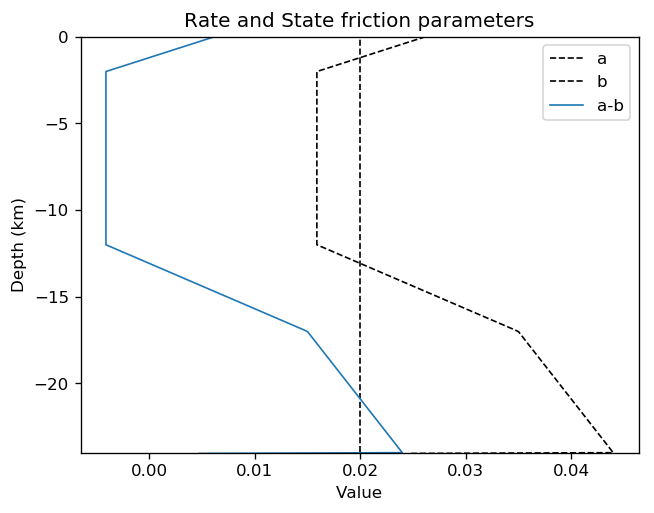

In [11]:
fricPlot(S.cca, S.ccb, S.FltX);

In [7]:
sim_time/60/60

53.54742751816

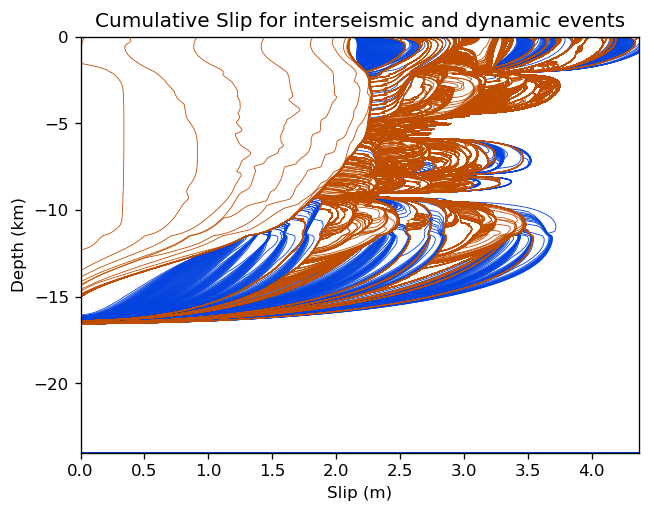

In [22]:
delfsec, delf5yr = cumSlip(O.Slip, O.SlipVel, O.time_)
cumSlipPlot(delfsec, delf5yr, S.FltX)

# MFD plot


In [71]:
include("scripts/earthquake-cycles.jl")

eq_catalog (generic function with 1 method)

In [70]:
Mw

6795-element Array{Float64,1}:
 6.692575231315093 
 4.28955627218814  
 3.6234098108022756
 3.7200545296672978
 3.568728531618131 
 3.4810435843468692
 3.5475150056774307
 3.3645385508853973
 3.3261949361707472
 3.538351022663278 
 3.31230948371487  
 3.410786625054847 
 3.393386333911222 
 ⋮                 
 1.0461871763324293
 0.8375956084163203
 0.9986154290478506
 0.8987234101749877
 1.0194550483271527
 0.8243025265969841
 0.9549486849743012
 0.8388134818262483
 2.69302143617001  
 3.000868698040831 
 2.9159568714379898
 2.003736255198948 

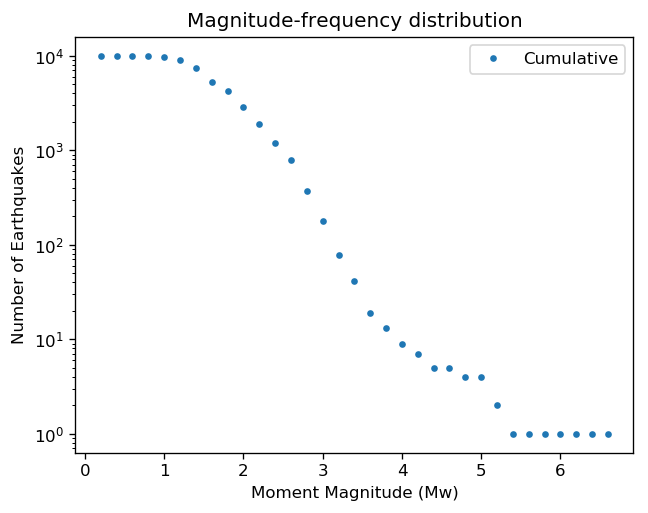

In [72]:
Mw = moment_magnitude(P, S, O.Slip, O.SlipVel, O.Stress, O.time_)

MwPlot(Mw)

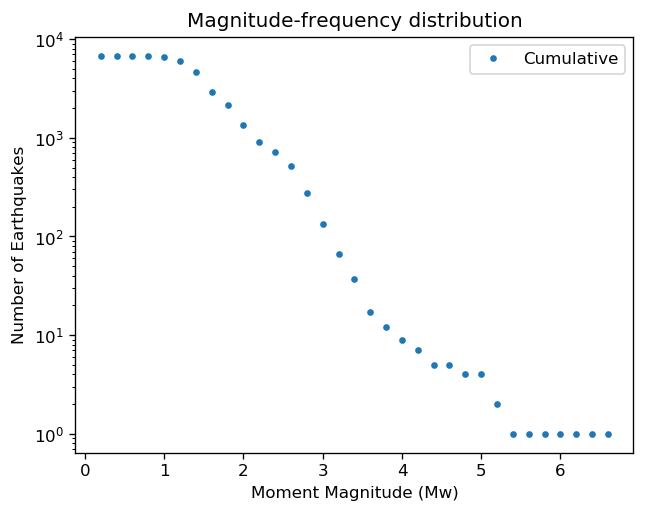

In [69]:
Mw = moment_magnitude(P, S, O.Slip, O.SlipVel, O.Stress, O.time_)

MwPlot(Mw)

<h3> Rough Work

delfafter, tStart, tEnd, vhypo, hypo = Coslip(S, O.Slip, O.SlipVel, O.time_);

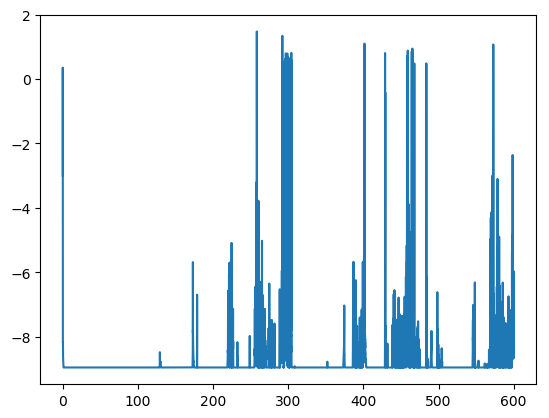

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x159ff8978>

In [16]:
Vfmax = maximum(O.SlipVel, dims = 1)[:]
PyPlot.plot(O.time_/P.yr2sec, log10.(Vfmax))

<h3> Earthquake Catalogue

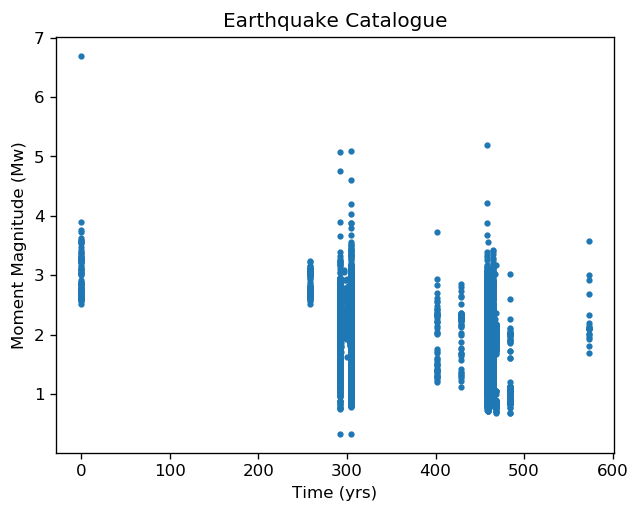

In [18]:
delfafter, tStart, = Coslip(S, O.Slip, O.SlipVel, O.time_)
eq_catalog(Mw, tStart, P.yr2sec)

<h3> Plot Hypocenter

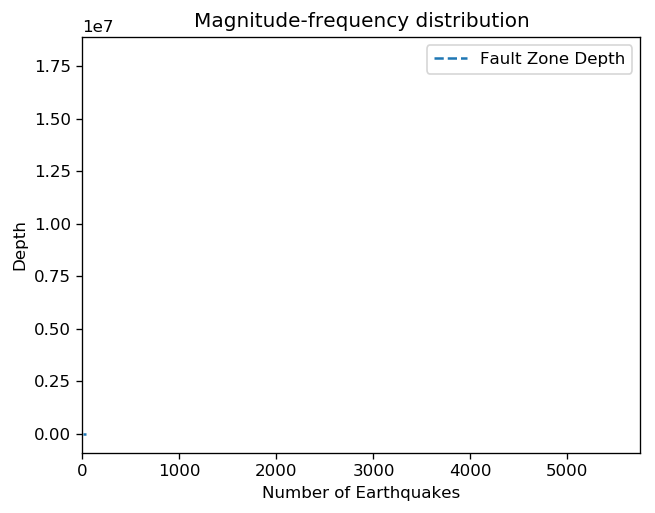

In [28]:
plotHypo(S, O.Slip, O.SlipVel, O.time_)

In [46]:
delfafter, tStart, hypo, vhypo = Coslip(S, O.Slip, O.SlipVel, O.time_);

In [34]:
hist = fit(Histogram, hypo./1e3, nbins = 20)


Histogram{Int64,1,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0:1.0e6:1.9e7
weights: [81, 0, 0, 0, 0, 0, 0, 0, 67, 5091, 0, 0, 52, 49, 5479, 83, 0, 0, 19]
closed: left
isdensity: false

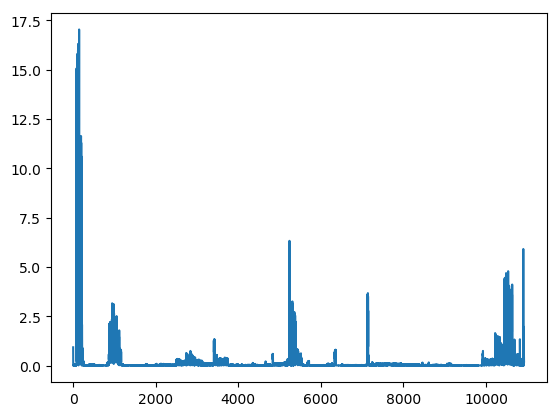

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1724fcc18>

In [51]:
plot(vhypo)

1.806662142768616e7

In [43]:
ai, indx = findmax(O.SlipVel[:,2])

(0.0010039224324283021, 685)

In [57]:
S.FltX

721-element Array{Float64,1}:
 -48000.0              
 -47953.95382276106    
 -47866.666666666664   
 -47779.37951057227    
 -47733.333333333336   
 -47687.2871560944     
 -47600.0              
 -47512.7128439056     
 -47466.666666666664   
 -47420.62048942773    
 -47333.333333333336   
 -47246.04617723894    
 -47200.0              
      ⋮                
   -753.953822761061   
   -666.6666666666642  
   -579.3795105722675  
   -533.3333333333285  
   -487.2871560943895  
   -399.9999999999927  
   -312.71284390559595 
   -266.66666666666424 
   -220.62048942772526 
   -133.33333333332848 
    -46.046177238931705
      0.0              